In [1]:
import torch as t
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

image,label=train_dataset[0]
print("Image shape:",image.shape)
print("Number of training samples:",len(train_dataset))

image,label=test_dataset[0]
print("Image shape:",image.shape)
print("Number of testing samples:",len(test_dataset))
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)


100%|██████████| 9.91M/9.91M [00:10<00:00, 901kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.99MB/s]

Image shape: torch.Size([1, 28, 28])
Number of training samples: 60000
Image shape: torch.Size([1, 28, 28])
Number of testing samples: 10000


In [2]:
!pip install torchsummary

In [3]:
class CNNClassifier(nn.Module):
  def __init__(self):
    super(CNNClassifier,self).__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1=nn.Linear(128*3*3,128)
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)

  def forward(self,x):
    x=self.pool(t.relu(self.conv1(x)))
    x=self.pool(t.relu(self.conv2(x)))
    x=self.pool(t.relu(self.conv3(x)))
    x=x.view(x.size(0),-1)
    x=nn.functional.relu(self.fc1(x))
    x=nn.functional.relu(self.fc2(x))
    x=self.fc3(x)
    return x

from torchsummary import summary
model=CNNClassifier()
if t.cuda.is_available():
  device=t.device("cuda")
  model.to(device)
print("Name: HAREVASU S")
print("Reg.no: 212223230069")
summary(model,input_size=(1,28,28))
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)


Name: HAREVASU S
Reg.no: 212223230069
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.95
Estimated Total Size (MB): 1.37
-----

In [4]:
def train_model(model,train_loader,num_epochs):
  for epoch in range(num_epochs):
    model.train()
    running_loss=0.0
    for images,labels in train_loader:
      if t.cuda.is_available():
        images,labels=images.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=model(images)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
print("Name: HAREVASU S")
print("Reg.no: 212223230069")

train_model(model,train_loader,num_epochs=10)

Name: HAREVASU S
Reg.no: 212223230069
Epoch [1/10], Loss: 0.1566
Epoch [2/10], Loss: 0.0458
Epoch [3/10], Loss: 0.0320
Epoch [4/10], Loss: 0.0266
Epoch [5/10], Loss: 0.0191
Epoch [6/10], Loss: 0.0178
Epoch [7/10], Loss: 0.0159
Epoch [8/10], Loss: 0.0119
Epoch [9/10], Loss: 0.0128
Epoch [10/10], Loss: 0.0107


Name: HAREVASU S
Reg.no: 212223230069
Test Accuracy: 0.9914
Name: HAREVASU S
Reg.no: 212223230069


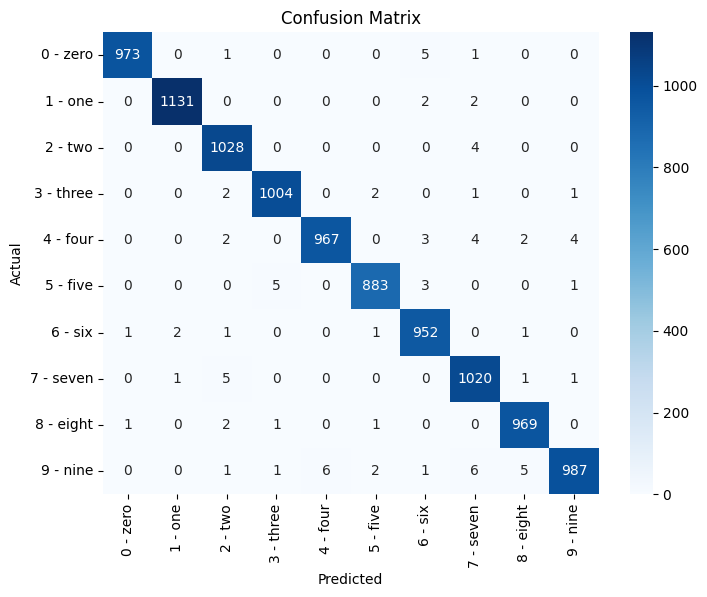

Name: HAREVASU S
Reg.no: 212223230069
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [5]:
def test_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  all_preds = []
  all_labels = []
  with t.no_grad():
    for images, labels in test_loader:
      if t.cuda.is_available():
        images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      _, predicted = t.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  accuracy = correct/total
  print("Name: HAREVASU S")
  print("Reg.no: 212223230069")
  print(f"Test Accuracy: {accuracy:.4f}")

  cm = confusion_matrix(all_labels, all_preds)
  plt.figure(figsize=(8, 6))
  print("Name: HAREVASU S")
  print("Reg.no: 212223230069")
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print("Name: HAREVASU S")
  print("Reg.no: 212223230069")
  print("Classification Report:")
  print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)]))
test_model(model, test_loader)